In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.pandas.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from numpy.random import seed
seed(42)

In [3]:
summaryL1Z1 = pd.read_csv('summary-L1-zone1.csv')
summaryL1Z2 = pd.read_csv('summary-L1-zone2.csv')
summaryL2Z1 = pd.read_csv('summary-L2-zone1.csv')
summaryL2Z2 = pd.read_csv('summary-L2-zone2.csv')
summaryL3Z1 = pd.read_csv('summary-L3-zone1.csv')
summaryL3Z2 = pd.read_csv('summary-L3-zone2.csv')

In [4]:
allData = summaryL1Z1.copy()
allData = allData.append(summaryL1Z2)
allData = allData.append(summaryL2Z1)
allData = allData.append(summaryL2Z2)
allData = allData.append(summaryL3Z1)
allData = allData.append(summaryL3Z2)
allData.head()

,LoopId,LoopStartTime,BackgroundThreads,LogCleanerThreads,NumIoThreads,NumNetworkThreads,NumPartitions,NumNodes,NumReplicaFetchers,ThreadsClient,MessageSize,TotalMessages
0,1,2019-07-06_03-02-41,10,1,4,3,1,1,1,10,10240,333614
1,2,2019-07-06_03-37-18,10,1,4,3,1,1,1,10,102400,74311
2,3,2019-07-06_04-11-56,10,1,4,3,1,1,1,15,10240,485829
3,4,2019-07-06_04-46-36,10,1,4,3,1,1,1,15,102400,75750
4,5,2019-07-06_05-20-39,10,1,4,3,1,1,1,20,10240,613018


In [5]:
# Find out the numerical variables
num_vars = [var for var in allData.columns if allData[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

Number of numerical variables:  11


In [6]:
num_vars

['LoopId',
 'BackgroundThreads',
 'LogCleanerThreads',
 'NumIoThreads',
 'NumNetworkThreads',
 'NumPartitions',
 'NumNodes',
 'NumReplicaFetchers',
 'ThreadsClient',
 'MessageSize',
 'TotalMessages']

In [7]:
#  Find out any discrete variables. We may consider discrete any numerical variables under a threshold, e.g. 5
discrete_vars = [var for var in num_vars if len(allData[var].unique())<5 and var not in ['LoopId']]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  7


In [8]:
discrete_vars

['LogCleanerThreads',
 'NumIoThreads',
 'NumNetworkThreads',
 'NumPartitions',
 'NumNodes',
 'NumReplicaFetchers',
 'MessageSize']

In [9]:
# Create the list of continuous variables
# We will consider continuous all those that are not temporal or discrete variables in our dataset.
cont_vars = [var for var in num_vars if var not in discrete_vars+['LoopId', 'TotalMessages']]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  2


In [10]:
cont_vars

['BackgroundThreads', 'ThreadsClient']

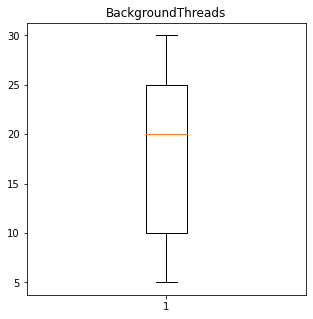

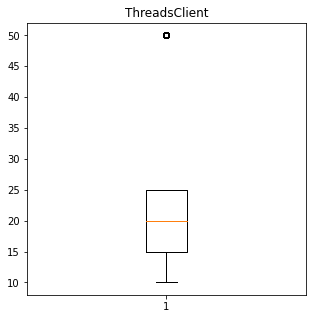

In [11]:
for var in cont_vars:
    plt.figure(figsize=(5,5))
    plt.boxplot(allData[var])
    plt.title(var)
    plt.show()

It appears from the above boxplots that only ThreadsClient has outliers

In [12]:
outliers=['ThreadsClient']
target_var = 'TotalMessages'
dropColumns=['LoopId', 'LoopStartTime']

In [13]:
allData = allData.drop(dropColumns, axis=1)

In [14]:
allData.shape

(900, 10)

In [15]:
allData.head()

,BackgroundThreads,LogCleanerThreads,NumIoThreads,NumNetworkThreads,NumPartitions,NumNodes,NumReplicaFetchers,ThreadsClient,MessageSize,TotalMessages
0,10,1,4,3,1,1,1,10,10240,333614
1,10,1,4,3,1,1,1,10,102400,74311
2,10,1,4,3,1,1,1,15,10240,485829
3,10,1,4,3,1,1,1,15,102400,75750
4,10,1,4,3,1,1,1,20,10240,613018


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(allData, allData.TotalMessages,
                                                    test_size=0.1,
                                                    random_state=0) # we are setting the seed here
X_train.shape, X_test.shape

((810, 10), (90, 10))

In [17]:
X_train = X_train.drop(target_var, axis=1)

In [18]:
X_test = X_test.drop(target_var, axis=1)